# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.170976e+01     8.011957e+00
 * time: 0.004255056381225586
     1     2.901034e+01     7.587341e+00
 * time: 0.020370960235595703
     2     2.015726e+01     6.661317e+00
 * time: 0.04014301300048828
     3     1.472482e+01     5.441028e+00
 * time: 0.05977296829223633
     4     1.082768e+01     1.470546e+00
 * time: 0.07957005500793457
     5     1.013838e+01     2.480519e+00
 * time: 0.09543204307556152
     6     9.576536e+00     1.464203e+00
 * time: 0.11114215850830078
     7     9.162285e+00     1.311650e+00
 * time: 0.1271660327911377
     8     8.833990e+00     1.455026e+00
 * time: 0.14283299446105957
     9     8.614239e+00     1.037516e+00
 * time: 0.15879011154174805
    10     8.476935e+00     8.063006e-01
 * time: 0.17518210411071777
    11     8.352353e+00     6.473201e-01
 * time: 0.19157695770263672
    12     8.247265e+00     5.811203e-01
 * time: 0.20390605926513672
    13     8.190181e+00     5.046836e-01
 * time

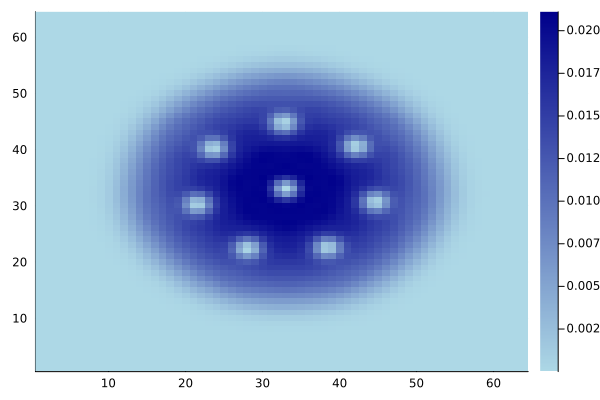

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)